In [176]:
# import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [177]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [178]:
# define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [179]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 29s 65ms/step - loss: 0.2153 - accuracy: 0.9368 - val_loss: 0.0573 - val_accuracy: 0.9848
Epoch 2/10
422/422 [==============================] - 29s 68ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0466 - val_accuracy: 0.9863
Epoch 3/10
422/422 [==============================] - 29s 68ms/step - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.0358 - val_accuracy: 0.9902
Epoch 4/10
422/422 [==============================] - 27s 65ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 5/10
422/422 [==============================] - 26s 61ms/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0338 - val_accuracy: 0.9907
Epoch 6/10
422/422 [==============================] - 26s 63ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0399 - val_accuracy: 0.9900
Epoch 7/10
422/422 [==============================] - 26s 63ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0418 - val_accuracy:

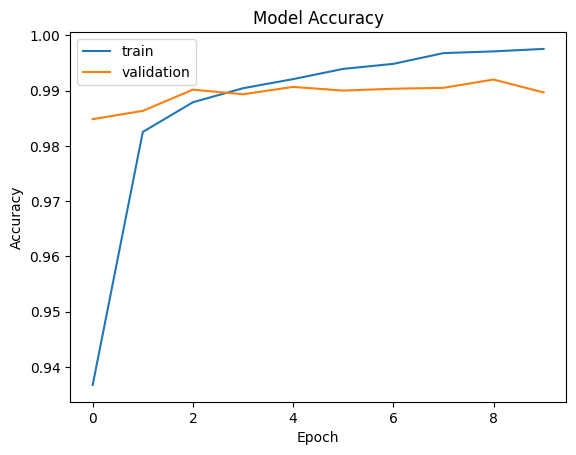

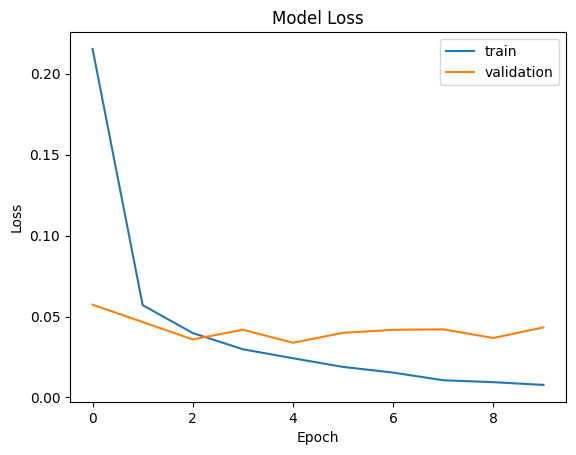

In [180]:
# create accuracy and loss plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('loss.png')
plt.show()

In [181]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0423 - accuracy: 0.9872
Test accuracy: 0.9872000217437744


313/313 [==============================] - 2s 6ms/step


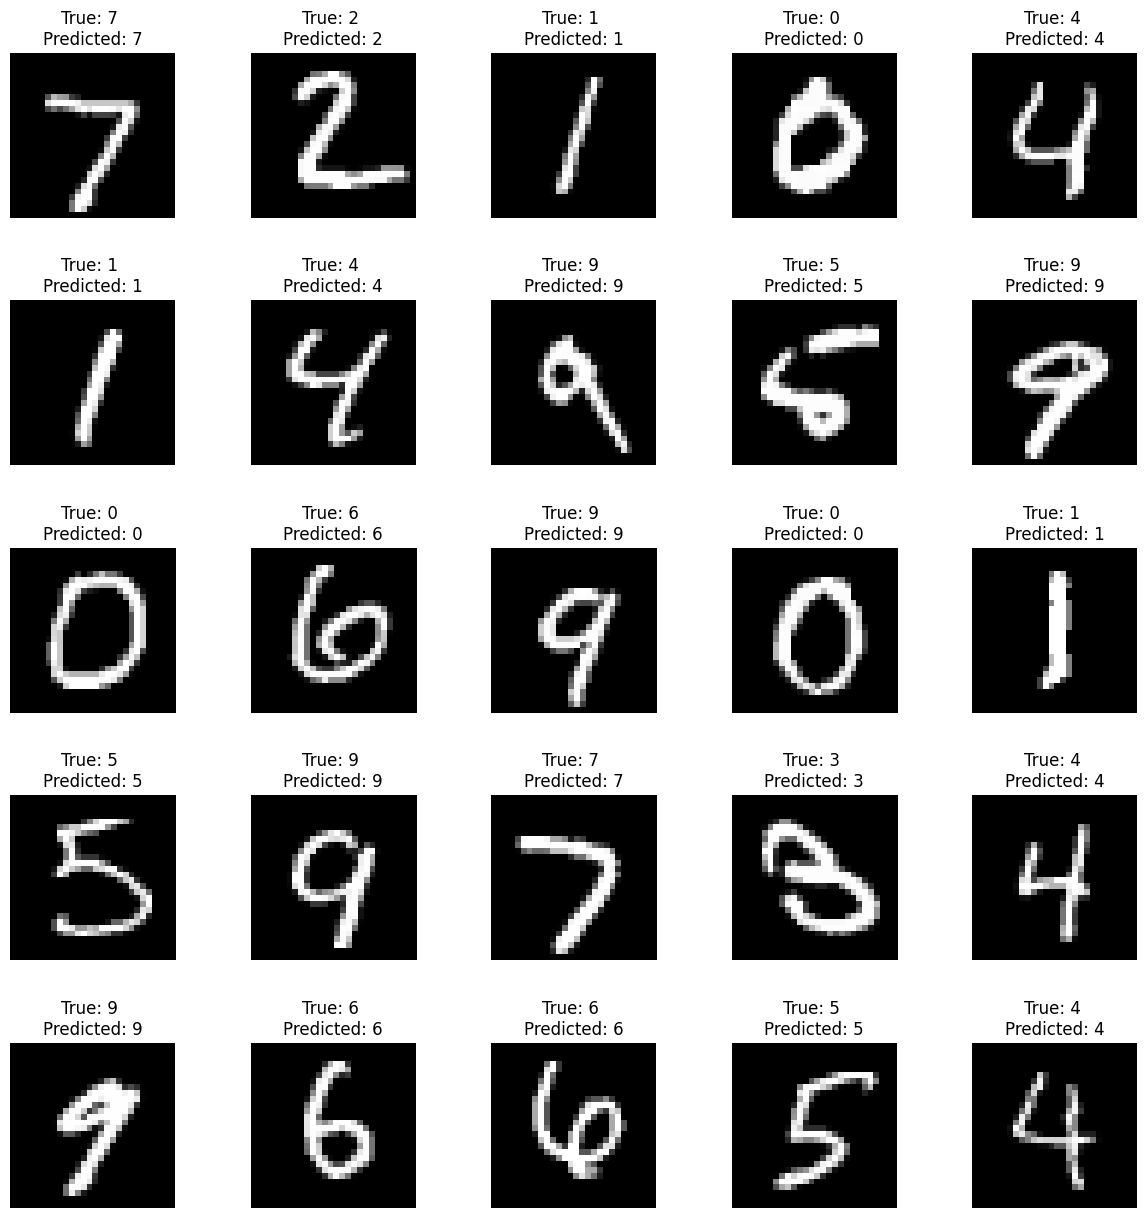

In [182]:
# Predict the labels for the test dataset
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Function to plot images, true labels, and predicted labels
def plot_images(images, true_labels, pred_labels, nrows=5, ncols=5):
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))
    axes = axes.ravel()

    for i in range(nrows * ncols):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"True: {true_labels[i]} \nPredicted: {pred_labels[i]}", fontsize=12)
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5)

# Visualize the testing results
plot_images(x_test, y_test_labels, y_pred_labels)
plt.show()

In [183]:
model.save("digit_detection_model.h5")